In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/score_updated.csv')
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
...,...,...
91,5.8,60
92,4.4,44
93,6.1,63
94,3.7,37


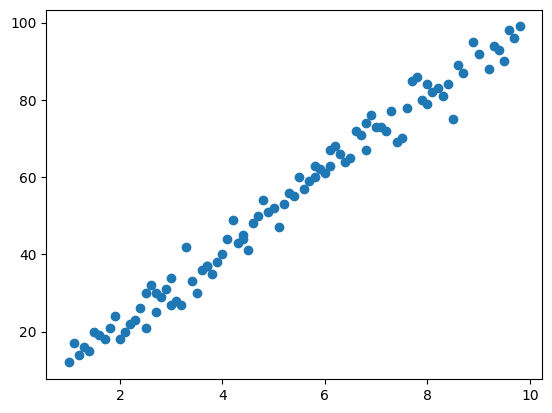

In [ ]:
plt.scatter(df.Hours,df.Scores)

In [ ]:
def loss_function(m, b, points):
  total_error = 0

  for i in range(len(points)):
    x = points.iloc[i].Hours
    y = points.iloc[i].Scores
    total_error += (y - (m* x + b)) ** 2
  total_error / float(len(points))

In [ ]:
def gradient_descent(m_now, b_now, points, L):
  m_gradient = 0
  b_gradient = 0
  n = len(points)
  for i in range(n):
    x = points.iloc[i].Hours
    y = points.iloc[i].Scores
    m_gradient += -(2/n) * x * (y - (m_now * x + b_now))
    b_gradient += -(2/n) * (y - (m_now * x + b_now))
  m = m_now - m_gradient * L
  b = b_now - b_gradient * L
  return m, b

In [ ]:
m = 0
b = 0
L = 0.0001
epochs = 1000
for i in range(epochs):
  if i % 100 == 0:
    print(f"epochs :{i}")
  m, b = gradient_descent(m, b, df, L)
print(m, b)
plt.scatter(df.Hours, df.Scores, color="black")
plt.plot(list(range (0, 10)),[m* x + b for x in range(0,10)],color="red")
plt.show()

epochs :0


NameError: name 'gradient_descent' is not defined

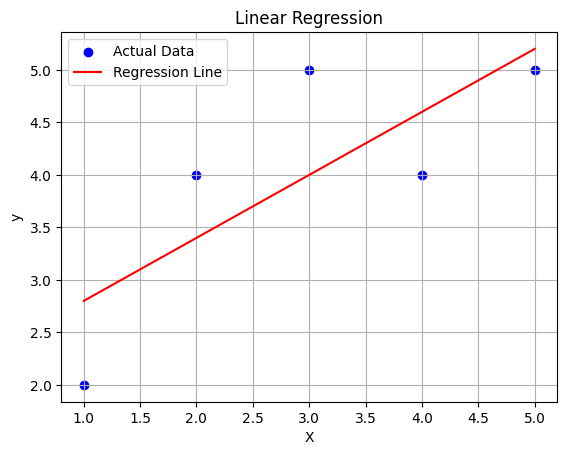

Slope: 0.6, Intercept: 2.2


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
X = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

# Mean of X and y
mean_x = np.mean(X)
mean_y = np.mean(y)

# Calculating coefficients
numerator = np.sum((X - mean_x) * (y - mean_y))
denominator = np.sum((X - mean_x) ** 2)

slope = numerator / denominator
intercept = mean_y - slope * mean_x

# Prediction line
y_pred = slope * X + intercept

# Plot
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression')
plt.grid()
plt.show()

print(f"Slope: {slope}, Intercept: {intercept}")

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Data
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([2, 4, 5, 4, 5])

# Model training
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Metrics
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Slope: {model.coef_[0]}, Intercept: {model.intercept_}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Slope: 0.6, Intercept: 2.2
Mean Squared Error: 0.48
R² Score: 0.60


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



In [ ]:
data = pd.read_csv('/content/sales_data_linear_imp.csv')
print(data.head())


         Date Store ID Product ID     Category Region  Inventory Level  \
0  2022-01-01     S001      P0001  Electronics  North              195   
1  2022-01-01     S001      P0002     Clothing  North              117   
2  2022-01-01     S001      P0003     Clothing  North              247   
3  2022-01-01     S001      P0004  Electronics  North              139   
4  2022-01-01     S001      P0005    Groceries  North              152   

   Units Sold  Units Ordered  Price  Discount Weather Condition  Promotion  \
0         102            252  72.72         5             Snowy          0   
1         117            249  80.16        15             Snowy          1   
2         114            612  62.94        10             Snowy          1   
3          45            102  87.63        10             Snowy          0   
4          65            271  54.41         0             Snowy          0   

   Competitor Pricing Seasonality  Epidemic  Demand  
0               85.73      Winte

In [ ]:
data = data.fillna(data.mean(numeric_only=True))
data

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Price,Discount,Weather Condition,Promotion,Competitor Pricing,Seasonality,Epidemic,Demand
0,2022-01-01,S001,P0001,Electronics,North,195,102,252,72.72,5,Snowy,0,85.73,Winter,0,115
1,2022-01-01,S001,P0002,Clothing,North,117,117,249,80.16,15,Snowy,1,92.02,Winter,0,229
2,2022-01-01,S001,P0003,Clothing,North,247,114,612,62.94,10,Snowy,1,60.08,Winter,0,157
3,2022-01-01,S001,P0004,Electronics,North,139,45,102,87.63,10,Snowy,0,85.19,Winter,0,52
4,2022-01-01,S001,P0005,Groceries,North,152,65,271,54.41,0,Snowy,0,51.63,Winter,0,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75995,2024-01-30,S005,P0016,Toys,North,233,63,0,29.80,5,Snowy,0,32.23,Winter,0,64
75996,2024-01-30,S005,P0017,Toys,North,137,115,141,42.92,5,Snowy,0,40.73,Winter,0,137
75997,2024-01-30,S005,P0018,Clothing,North,197,44,0,17.81,10,Snowy,0,19.41,Winter,0,68
75998,2024-01-30,S005,P0019,Furniture,North,125,58,0,151.72,0,Snowy,0,143.71,Winter,0,84


In [ ]:
X = data.drop(columns=['Epidemic'])
y = data['Demand']
data

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Price,Discount,Weather Condition,Promotion,Competitor Pricing,Seasonality,Epidemic,Demand
0,2022-01-01,S001,P0001,Electronics,North,195,102,252,72.72,5,Snowy,0,85.73,Winter,0,115
1,2022-01-01,S001,P0002,Clothing,North,117,117,249,80.16,15,Snowy,1,92.02,Winter,0,229
2,2022-01-01,S001,P0003,Clothing,North,247,114,612,62.94,10,Snowy,1,60.08,Winter,0,157
3,2022-01-01,S001,P0004,Electronics,North,139,45,102,87.63,10,Snowy,0,85.19,Winter,0,52
4,2022-01-01,S001,P0005,Groceries,North,152,65,271,54.41,0,Snowy,0,51.63,Winter,0,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75995,2024-01-30,S005,P0016,Toys,North,233,63,0,29.80,5,Snowy,0,32.23,Winter,0,64
75996,2024-01-30,S005,P0017,Toys,North,137,115,141,42.92,5,Snowy,0,40.73,Winter,0,137
75997,2024-01-30,S005,P0018,Clothing,North,197,44,0,17.81,10,Snowy,0,19.41,Winter,0,68
75998,2024-01-30,S005,P0019,Furniture,North,125,58,0,151.72,0,Snowy,0,143.71,Winter,0,84


In [ ]:

categorical_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
data

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Price,Discount,Weather Condition,Promotion,Competitor Pricing,Seasonality,Epidemic,Demand
0,2022-01-01,S001,P0001,Electronics,North,195,102,252,72.72,5,Snowy,0,85.73,Winter,0,115
1,2022-01-01,S001,P0002,Clothing,North,117,117,249,80.16,15,Snowy,1,92.02,Winter,0,229
2,2022-01-01,S001,P0003,Clothing,North,247,114,612,62.94,10,Snowy,1,60.08,Winter,0,157
3,2022-01-01,S001,P0004,Electronics,North,139,45,102,87.63,10,Snowy,0,85.19,Winter,0,52
4,2022-01-01,S001,P0005,Groceries,North,152,65,271,54.41,0,Snowy,0,51.63,Winter,0,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75995,2024-01-30,S005,P0016,Toys,North,233,63,0,29.80,5,Snowy,0,32.23,Winter,0,64
75996,2024-01-30,S005,P0017,Toys,North,137,115,141,42.92,5,Snowy,0,40.73,Winter,0,137
75997,2024-01-30,S005,P0018,Clothing,North,197,44,0,17.81,10,Snowy,0,19.41,Winter,0,68
75998,2024-01-30,S005,P0019,Furniture,North,125,58,0,151.72,0,Snowy,0,143.71,Winter,0,84


In [ ]:
numeric_cols = X.select_dtypes(include=[np.number]).columns

X[numeric_cols] = (X[numeric_cols] - X[numeric_cols].min()) / (X[numeric_cols].max() - X[numeric_cols].min())

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.3,train_size=0.7, random_state=42)




In [ ]:
m, n = X_train.shape
weight = np.zeros(n)
bias = 0
lr = 0.01
epochs = 1000

def compute_loss(X, y, weight, bias):
    y_pred = np.dot(X, weight) + bias
    loss = np.mean((y - y_pred) ** 2)
    return loss


In [ ]:
losses = []
for epoch in range(epochs):
    y_pred = np.dot(X_train, weight) + bias
    error = y_pred - y_train

    d_weight = (2/m) * np.dot(X_train.T, error)
    d_bias = (2/m) * np.sum(error)

    weight -= lr * d_weight
    bias -= lr * d_bias

    loss = compute_loss(X_train, y_train, weight, bias)
    losses.append(loss)

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")


Epoch 0, Loss: 12233.5191
Epoch 100, Loss: 2339.4087
Epoch 200, Loss: 2123.2942
Epoch 300, Loss: 2078.9515
Epoch 400, Loss: 2038.7985
Epoch 500, Loss: 1999.8363
Epoch 600, Loss: 1962.0056
Epoch 700, Loss: 1925.3042
Epoch 800, Loss: 1889.7321
Epoch 900, Loss: 1855.2893


In [ ]:

y_test_pred = np.dot(X_test, weight) + bias
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f"\nTest MSE: {mse:.4f}")
print(f"Test R² Score: {r2:.4f}")



Test MSE: 948.4378
Test R² Score: 0.5695


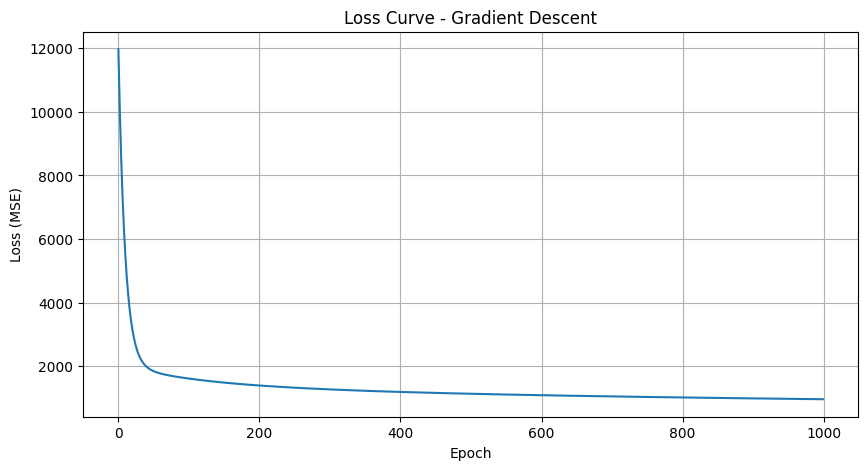

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Loss Curve - Gradient Descent')
plt.grid()
plt.show()

R² Score (Test Accuracy): 0.7826050069048304


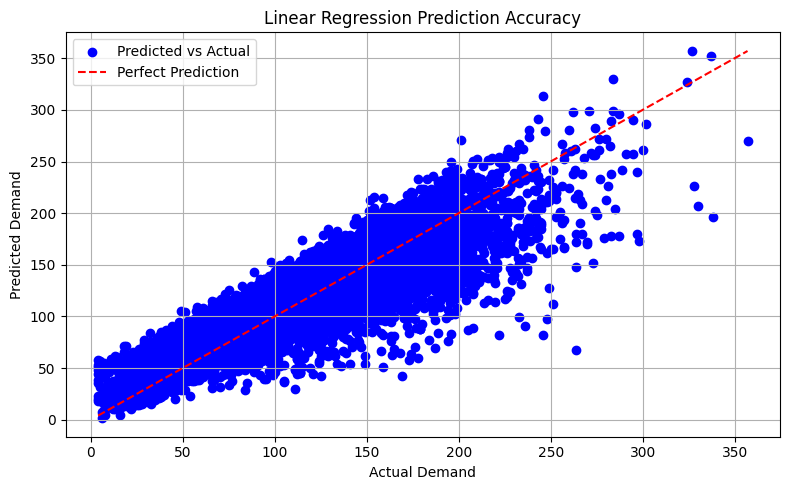

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

df = pd.read_csv("/content/sales_data_linear_imp.csv")


df_encoded = pd.get_dummies(df, drop_first=True)


X = df_encoded.drop("Demand", axis=1)
y = df_encoded["Demand"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


r2 = r2_score(y_test, y_pred)
print("R² Score (Test Accuracy):", r2)


plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel("Actual Demand")
plt.ylabel("Predicted Demand")
plt.title("Linear Regression Prediction Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import pickle  # Assuming you saved your model using pickle

# Load the trained model
with open('retail_demand_model.pkl', 'rb') as file:
    model = pickle.load(file)

# Function to get user input
def get_user_input():
    print("Enter input values for prediction:")
    store_type = int(input("Store Type (e.g., 0 for Grocery, 1 for Supermarket): "))
    is_weekend = int(input("Is Weekend? (0 = No, 1 = Yes): "))
    is_holiday = int(input("Is Holiday? (0 = No, 1 = Yes): "))
    temperature = float(input("Temperature in Celsius: "))
    promotions = int(input("Ongoing Promotions (0 = No, 1 = Yes): "))

    return np.array([[store_type, is_weekend, is_holiday, temperature, promotions]])

# Get input and predict
input_data = get_user_input()
predicted_demand = model.predict(input_data)

# Show output
print(f"\n🧾 Predicted Demand: {predicted_demand[0]:.2f} units")

FileNotFoundError: [Errno 2] No such file or directory: 'retail_demand_model.pkl'